# Лабораторная работа 5

## Клепиков Никита

Dataset: Students Performance in Exams

Ссылка на датасет: https://www.kaggle.com/spscientist/students-performance-in-exams

Группа: 6132 - 010402D

Для начала необходимо подключить необходимые для выполнения лабораторной работы библиотеки

In [1]:
import pandas as pd
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from catboost import *
from catboost.datasets import amazon
from sklearn.metrics import accuracy_score, PrecisionRecallDisplay, mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score
from warnings import filterwarnings
import sklearn.metrics
filterwarnings("ignore")

0 Подобрать набор данных для классификации (количество классов не имеет значения) и регрессии. Важно наличие числовых и категориальных признаков в данных. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. Можно работать на тех же данных, что и в предыдущей Л.Р.: в этом случае сравнить с результатами лучшего классификатора из предыдущей работы.

In [2]:
students = pd.read_csv('Students.csv')
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


* gender - пол (бинарный)
        male - мужской
        female - женский
* race/ethnicity - раса/этническая принадлежность (категориальный)
        group A
        group B
        group C
        group D
        group E

* parental level of education - уровень образования родителей (категориальный)
        bachelor's degree - степень бакалавра
        some college - несколько колледжей
        master's degree - степень магистра
        associate's degree - степень младшего специалиста
        high school - средняя школа
        some high school - несколько средних школ
* lunch - обед (бинарный)
        standard - стандартный
        free/reduced - бесплатный/льготный
* test preparation course - курс подготовки к экзаменам (бинарный)
        completed - пройден
        none - не пройден
* math score - баллы по математике (числовой)

* reading score - баллы по чтению (числовой)

* writing score - баллы по письменному экзамену (числовой)

* sum - сумма баллов (числовой)

* status - статус (бинарный)
        clever - умный
        beautiful - красивый
* gpa - средний балл (числовой)

In [3]:
students["gender"], _ = pd.factorize(students["gender"])
students["test preparation course"], _ = pd.factorize(students["test preparation course"])
students["race/ethnicity"], _ = pd.factorize(students["race/ethnicity"])
students["parental level of education"], _ = pd.factorize(students["parental level of education"])
students["lunch"], _ = pd.factorize(students["lunch"])

1 Применить классификатор CatBoostClassifier к вашему набору данных. Обратите внимание, что catboost умеет работать с категориальными признаками (параметр cat_features - список индексов категориальных признаков), поэтому использование pd.factorize / pd.get_dummies здесь лишнее.

* Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss.
* Вывести значения метрик качества классификации на тестовых данных (accuracy и precision / recall / AUC, если применимо).
* В случае бинарной классификации на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.

In [4]:
labels = students['gender']
students.drop(columns='gender', axis=1, inplace=True)
students.shape, labels.shape

((1000, 7), (1000,))

In [5]:
features = ['race/ethnicity', 'parental level of education']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(students, labels, test_size=0.3, random_state=0)

model = CatBoostClassifier(
    iterations=100,
    loss_function='Logloss'
)
model.fit(
    X_train, y_train,
    cat_features=features,
    eval_set=(X_test, y_test),
    verbose = False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [7]:
print(f"Model is fitted: {model.is_fitted()}")
print(f"Model params: {model.get_params()}")
print(f"Best iteration: {model.get_best_iteration()}")
print(f"Best score: {model.best_score_}")
print(f"Accuracy: {accuracy_score(y_test, model.predict(X_test))}")
print(f"AUC: {roc_auc_score(y_test, model.predict(X_test))}")
print(f"Precision: {precision_score(y_test, model.predict(X_test))}")
print(f"Recall: {recall_score(y_test, model.predict(X_test))}")

Model is fitted: True
Model params: {'iterations': 100, 'loss_function': 'Logloss'}
Best iteration: 99
Best score: {'learn': {'Logloss': 0.2961444344744521}, 'validation': {'Logloss': 0.32105701967127426}}
Accuracy: 0.88
AUC: 0.8785879835977892
Precision: 0.8897058823529411
Recall: 0.852112676056338


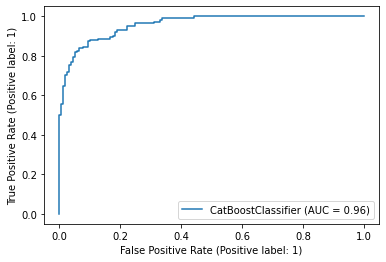

In [8]:
plot_roc_curve(model, X_test, y_test)

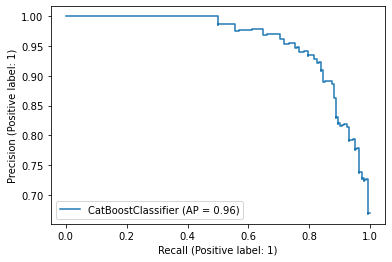

In [9]:
sklearn.metrics.plot_precision_recall_curve(model, X_test, y_test, name="CatBoostClassifier")

2 Применить регрессию CatBoostRegressor к набору данных для регрессии. Вывести номер итерации и значения метрик (MAE и MSE) для наилучшей итерации. Обратите внимание, что в задаче восстановления регрессии целевая переменная имеет непрерывные значения.

In [10]:
model_regressor = CatBoostRegressor(
    custom_metric=["MAE", "RMSE"], 
    cat_features=features
)

model_regressor.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [11]:
print(f"Best iteration: {model_regressor.get_best_iteration()}")
print(f"Best score: {model_regressor.get_best_score()}")
print(f"Model params: {model_regressor.get_params()}")
print(f"MAE: {mean_absolute_error(y_test, model_regressor.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, model_regressor.predict(X_test))}")

Best iteration: 783
Best score: {'learn': {'MAE': 0.10475601642585274, 'RMSE': 0.14215737225304728}, 'validation': {'MAE': 0.2138945149274954, 'RMSE': 0.29053692625062244}}
Model params: {'loss_function': 'RMSE', 'custom_metric': ['MAE', 'RMSE'], 'cat_features': ['race/ethnicity', 'parental level of education']}
MAE: 0.2144933214920198
MSE: 0.08441170551515968
